# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [49]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [ ]:
# Add any additional import statements you need here
import matplotlib.pyplot as plt

In [6]:
# change `data_location` to the location of the folder on your machine.
data_location = "M1 Results/"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [31]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.

    """

    # Fill in the correct values here.
    total_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / total_tokens if total_tokens > 0 else 0

    if verbose:
        print(f"There are {total_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        # print the five most common tokens
        print(f"The {num_tokens} most common tokens are:")
        for token, freq in Counter(tokens).most_common(num_tokens):
            print(f"'{token}': {freq}")

    return([total_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


In [32]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens are:
'text': 3
'here': 2
'example': 2
'is': 1
'some': 1


Q: Why is it beneficial to use assertion statements in your code?

A: Assertion statements are beneficial because they help check to see that the code is working as expected. If something isn't right, they stop the program and show an error which helps for detecting bugs.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [14]:
twitter_folder = os.path.join(data_location, twitter_folder)
lyrics_folder = os.path.join(data_location, lyrics_folder)

In [15]:
# Read in the lyrics data
lyrics_data = {}

for artist in os.listdir(lyrics_folder):
    artist_path = os.path.join(lyrics_folder, artist)
    if os.path.isdir(artist_path):
        lyrics_data[artist] = {}
        for song_file in os.listdir(artist_path):
            if song_file.endswith(".txt"):
                with open(os.path.join(artist_path, song_file), 'r', encoding='utf-8') as f:
                    content = f.read()
                    song_title = song_file.replace(".txt", "")
                    lyrics_data[artist][song_title] = content

In [16]:
print(lyrics_data.keys())

dict_keys(['cher', 'robyn'])


In [19]:
# Read in the twitter data
twitter_data = {}

for file in os.listdir(twitter_folder):
    if file.endswith("_followers_data.txt"):
        artist = file.split("_")[0]  # e.g., 'cher'
        path = os.path.join(twitter_folder, file)

        # Read TSV, skipping any bad rows
        df = pd.read_csv(path, sep="\t", encoding='utf-8', on_bad_lines='skip')

        # Extract non-empty descriptions
        descriptions = df['description'].dropna()
        descriptions = [desc for desc in descriptions if isinstance(desc, str) and desc.strip() != ""]

        twitter_data[artist] = descriptions

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [21]:
punctuation = set(punctuation) # speeds up comparison

In [24]:
def clean_and_tokenize(text):
    text = text.lower()  # lowercase
    text = re.sub(rf"[{re.escape(''.join(punctuation))}]", "", text)  # remove punctuation
    tokens = text.split()  # split on whitespace
    tokens = [word for word in tokens if word not in sw]  # remove stopwords
    return tokens

In [25]:
# create your clean twitter data here
clean_twitter_data = {}

for artist, descriptions in twitter_data.items():
    clean_twitter_data[artist] = []
    for desc in descriptions:
        tokens = clean_and_tokenize(desc)
        clean_twitter_data[artist].append(tokens)

In [26]:
# create your clean lyrics data here
clean_lyrics_data = {}

for artist, songs in lyrics_data.items():
    clean_lyrics_data[artist] = {}
    for song_title, lyrics in songs.items():
        tokens = clean_and_tokenize(lyrics)
        clean_lyrics_data[artist][song_title] = tokens

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [34]:
# Cher - Twitter
cher_twitter_tokens = [token for desc in clean_twitter_data["cher"] for token in desc]
print("Cher - Twitter Descriptions")
descriptive_stats(cher_twitter_tokens, num_tokens=5, verbose=True)

# Cher - Lyrics
cher_lyrics_tokens = []
for tokens in clean_lyrics_data["cher"].values():
    cher_lyrics_tokens.extend(tokens)
print("\nCher - Lyrics")
descriptive_stats(cher_lyrics_tokens, num_tokens=5, verbose=True)

# Robyn - Twitter
robyn_twitter_tokens = [token for desc in clean_twitter_data["robynkonichiwa"] for token in desc]
print("\nRobyn - Twitter Descriptions")
descriptive_stats(robyn_twitter_tokens, num_tokens=5, verbose=True)

# Robyn - Lyrics
robyn_lyrics_tokens = []
for tokens in clean_lyrics_data["robyn"].values():
    robyn_lyrics_tokens.extend(tokens)
print("\nRobyn - Lyrics")
descriptive_stats(robyn_lyrics_tokens, num_tokens=5, verbose=True)

Cher - Twitter Descriptions
There are 16148900 tokens in the data.
There are 1697994 unique tokens in the data.
There are 96043593 characters in the data.
The lexical diversity is 0.105 in the data.
The 5 most common tokens are:
'love': 214529
'im': 139037
'life': 122900
'music': 88168
'de': 73277

Cher - Lyrics
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
The 5 most common tokens are:
'love': 1004
'im': 513
'know': 486
'dont': 440
'youre': 333

Robyn - Twitter Descriptions
There are 1538163 tokens in the data.
There are 271325 unique tokens in the data.
There are 9397180 characters in the data.
The lexical diversity is 0.176 in the data.
The 5 most common tokens are:
'music': 15160
'love': 11683
'im': 9052
'och': 7922
'life': 7387

Robyn - Lyrics
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The le

[15227, 2156, 0.14159059565245943, 73787]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A:

If we left stopwords in the data, the top 5 most common words would likely include more generic words such as "the," "and," "is," "to," "you," "I," etc. These words appear very often in natural language but don't carry as much meaning as words like "love" or "music."

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A:

Initially, I didn’t have strong expectations about lexical diversity, but I assumed that both artists would have similar levels since they are both pop musicians with broad audiences. However, the results show that Robyn’s lyrics and Twitter fans use a more diverse vocabulary compared to Cher’s.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [35]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [46]:
def extract_emojis(text):
    return [ch for ch in text if ch in emoji.EMOJI_DATA]

emoji_counts = {}
for artist, descriptions in twitter_data.items():
    all_emojis = []
    for desc in descriptions:
        all_emojis.extend(extract_emojis(desc))
    emoji_counts[artist] = Counter(all_emojis).most_common(10)
print(emoji_counts)

{'robynkonichiwa': [('❤', 4808), ('🌈', 4702), ('🏳', 3539), ('♥', 3117), ('✨', 2240), ('🏻', 1498), ('✌', 1194), ('🏼', 1145), ('♀', 848), ('💙', 818)], 'cher': [('❤', 79373), ('🌈', 47795), ('♥', 34239), ('🏳', 33591), ('✨', 29715), ('💙', 21498), ('🏻', 20970), ('🌊', 20319), ('✌', 16876), ('💜', 16607)]}


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [47]:
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

hashtag_counts = {}
for artist, descriptions in twitter_data.items():
    all_hashtags = []
    for desc in descriptions:
        all_hashtags.extend(extract_hashtags(desc.lower()))
    hashtag_counts[artist] = Counter(all_hashtags).most_common(10)
print(hashtag_counts)

{'robynkonichiwa': [('#blacklivesmatter', 601), ('#blm', 363), ('#music', 306), ('#1', 199), ('#teamfollowback', 135), ('#edm', 111), ('#lgbtq', 89), ('#resist', 86), ('#travel', 73), ('#art', 72)], 'cher': [('#resist', 11647), ('#blm', 10462), ('#blacklivesmatter', 8146), ('#theresistance', 3505), ('#fbr', 3418), ('#resistance', 3057), ('#1', 2633), ('#voteblue', 2302), ('#lgbtq', 2072), ('#music', 1601)]}


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [48]:
title_word_counts = {}
for artist, songs in lyrics_data.items():
    all_title_words = []
    for song_title in songs.keys():
        words = re.findall(r"\b\w+\b", song_title.lower())
        all_title_words.extend(words)
    title_word_counts[artist] = Counter(all_title_words).most_common(5)
print(title_word_counts)

{'cher': [('cher_hewasbeautiful', 1), ('cher_stars', 1), ('cher_iminthemiddle', 1), ('cher_taxitaxi', 1), ('cher_youvemademesoveryhappy', 1)], 'robyn': [('robyn_hangwithme114525', 1), ('robyn_doitagain', 1), ('robyn_curriculumvitae', 1), ('robyn_inmyheart', 1), ('robyn_showmelove', 1)]}


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


,length
artist,
Artist 1,"Axes(0.125,0.11;0.775x0.77)"
Artist 2,"Axes(0.125,0.11;0.775x0.77)"


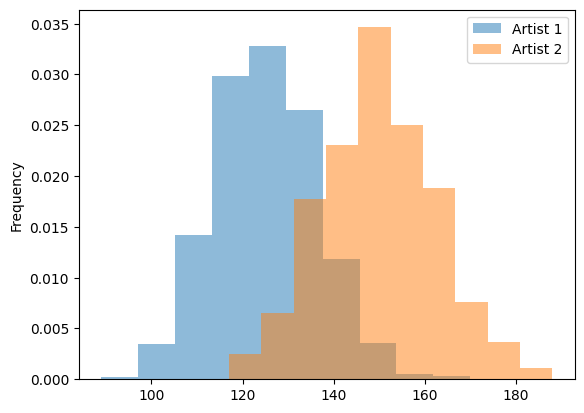

In [42]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

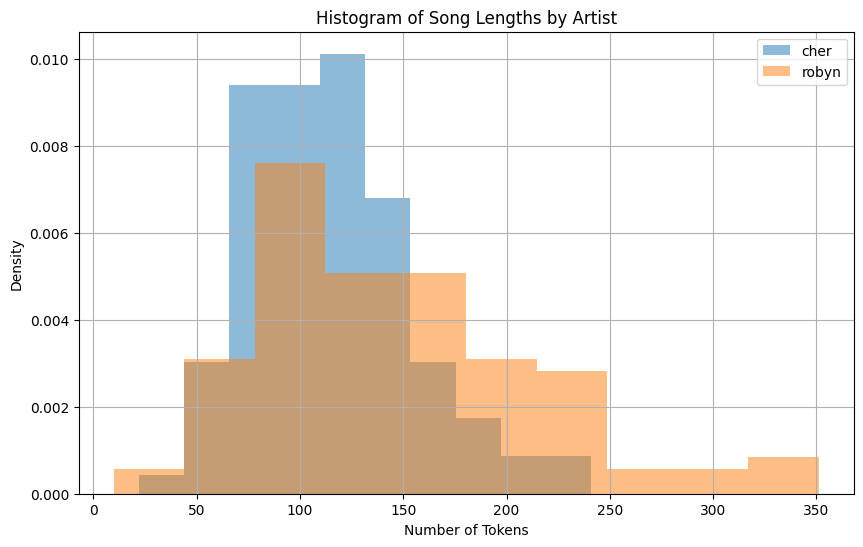

In [41]:
song_lengths = []
for artist, songs in clean_lyrics_data.items():
    for song_title, tokens in songs.items():
        song_lengths.append({
            "artist": artist,
            "length": len(tokens)
        })

df_lengths = pd.DataFrame(song_lengths)

plt.figure(figsize=(10, 6))
for artist in df_lengths["artist"].unique():
    df_lengths[df_lengths["artist"] == artist]["length"].plot(kind="hist", density=True, alpha=0.5, legend=True, label=artist)
plt.title("Histogram of Song Lengths by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: The regular expression \s+ matches one or more whitespace characters.

In [44]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

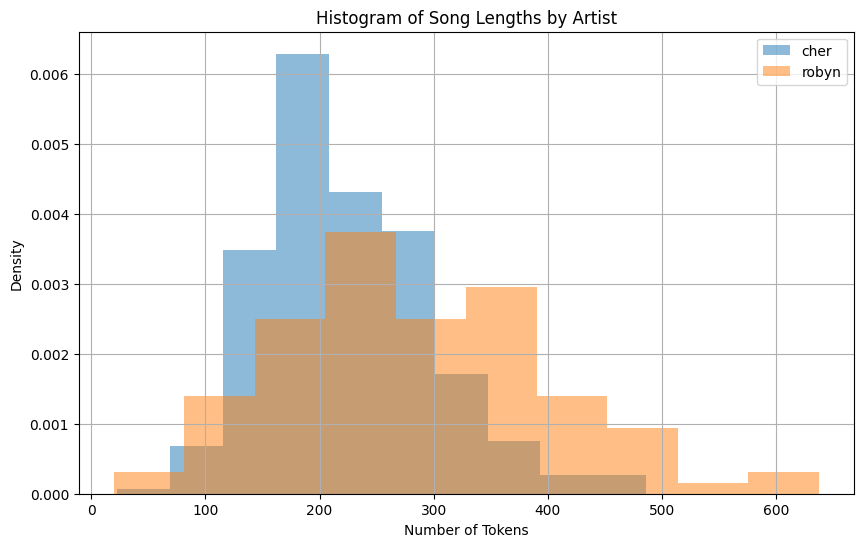

In [45]:
# Your lyric length comparison chart here.
song_lengths = []

for artist, songs in lyrics_data.items():
    for title, raw_lyrics in songs.items():
        tokens = tokenize_lyrics(raw_lyrics)
        song_lengths.append({
            "artist": artist,
            "length": len(tokens)
        })

df_lengths = pd.DataFrame(song_lengths)

plt.figure(figsize=(10, 6))
for artist in df_lengths["artist"].unique():
    df_lengths[df_lengths["artist"] == artist]["length"].plot(kind="hist", density=True, alpha=0.5, legend=True, label=artist)
plt.title("Histogram of Song Lengths by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()